In [2]:
import pandas as pd
import numpy as np
from pbn import operations  as ops
from pbn import conversions as convert
from matplotlib import pyplot as plt
from matplotlib import image  as matimg
from scipy import ndimage
from pbn import suite as pbn_suite
%matplotlib inline

# Load Image

In [306]:
n_colors=36
img_name = 'dog'
img_path = lambda filename: os.path.join('/Users/eczech/data/pbn/paintings', img_name, filename)

(532, 666, 3)


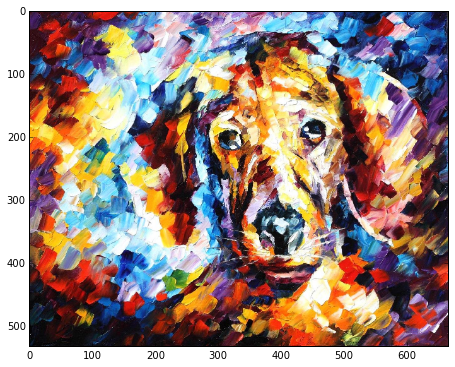

In [308]:
img_raw = matimg.imread(img_path('source.png'))

#img_rgb = img_rgb[-600:, 0:400]
img_rgb = scipy.ndimage.zoom(img_raw, (.5, .5, 1), order=1)
img_shape = img_rgb.shape
print(img_shape)

plt.figure(figsize=(12,6))
plt.imshow(img_rgb)

In [309]:
img_df = ops.unravel(convert.rgb_to_lab(img_rgb))

# Select Hyperparameters

In [310]:
# grid = {'alpha': [.01, .006], 'n_components': [650]} # catamaran
grid = {'alpha': [.02, .006], 'n_components': [650]} # sailboat
grid_res = pbn_suite.run_cluster_grid(img_df, grid, par_n_jobs=1)

INFO:pbn.suite:Running pbn clustering for param grid {'alpha': [0.02, 0.006], 'n_components': [650]}
INFO:pbn.suite:Running pbn clustering for parameters {'alpha': 0.02, 'n_components': 650}
INFO:pbn.suite:Running pbn clustering for parameters {'alpha': 0.006, 'n_components': 650}
INFO:pbn.suite:Grid clustering run complete


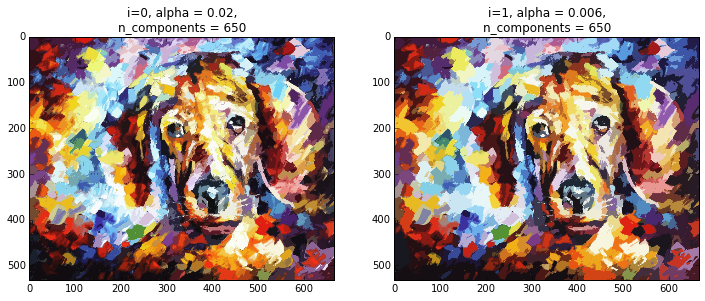

In [311]:
pbn_suite.show_cluster_grid_results(grid_res, img_shape, n_cols=2)

In [289]:
from IPython.display import Audio
sound_file = '/Users/eczech/Downloads/alert.mp3'
Audio(sound_file, autoplay=True)

In [269]:
import imp
imp.reload(pbn_suite)

<module 'pbn.suite' from '/Users/eczech/repos/portfolio/functional/paint_by_numbers/python/pbn/suite.py'>

### Select Result From Above

In [290]:
for i, r in enumerate(grid_res):
    print('{}: alpha = {}, n_components = {}'.format(i, r['alpha'], r['n_components']))

0: alpha = 0.02, n_components = 650
1: alpha = 0.006, n_components = 650


In [291]:
res_idx = 0
res = grid_res[res_idx]

# Cluster Colors

In [292]:
cols = [c for c in res['img_df'].columns if c.endswith('_m')]
c_res = pbn_suite.get_color_clusters(res['img_df'], cols, res['alpha'], n_colors)

### Show Inferred Clusters

(525, 711, 3)


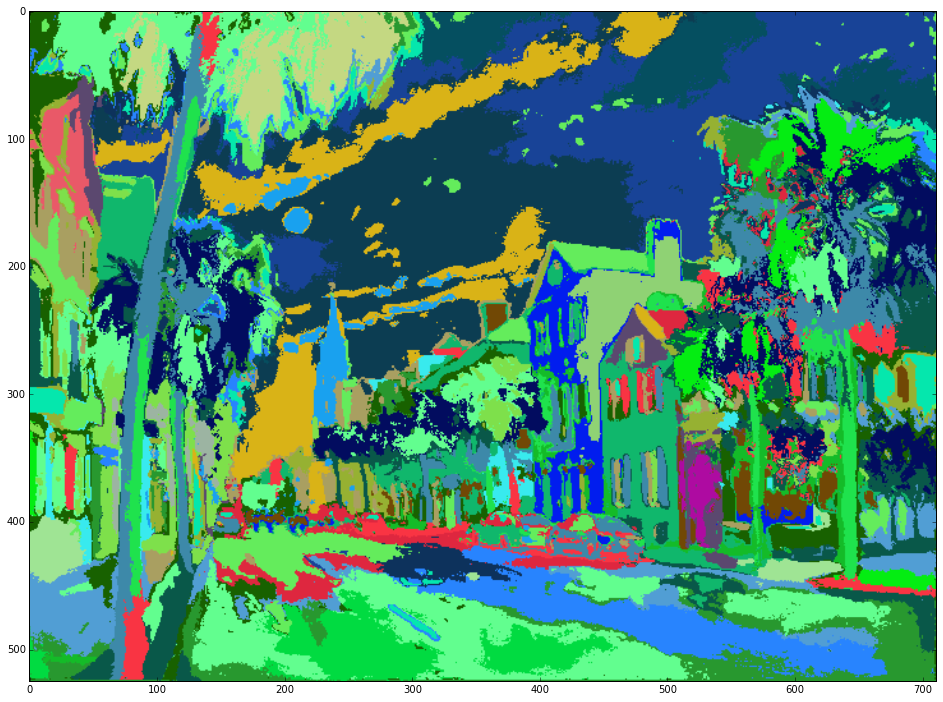

In [293]:
img_cluster_highlight = pbn_suite.get_cluster_highlights(c_res['img_df'], img_shape, 'cc')
plt.figure(figsize=(24,12))
plt.imshow(img_cluster_highlight)

# Determine Cluster Properties

In [294]:
#c_props = pbn_suite.get_cluster_properties(c_res['img_df'], img_shape, threshold=.8, shrinkage=1, n_iterations=1)
# shrinkage --> less means more detailed
# threshold --> less means more detailed

# catamaran, sailboat
c_props = pbn_suite.get_cluster_properties(c_res['img_df'], img_shape, threshold=.8, shrinkage=1, n_iterations=1)

# downtown
#c_props = pbn_suite.get_cluster_properties(c_res['img_df'], img_shape, threshold=.6, shrinkage=2, n_iterations=1)

1964 clusters collapsed of 6653


# Render Final Images

In [295]:
import imp
imp.reload(ops)
imp.reload(pbn_suite)

<module 'pbn.suite' from '/Users/eczech/repos/portfolio/functional/paint_by_numbers/python/pbn/suite.py'>

In [301]:
pbn = pbn_suite.render(c_props['properties'], img_rgb, res['alpha'], 
                       scale_factor=3, bkg=[1,1,1], edg=[.5,.5,.5], lbl=[.3,.3,.3])

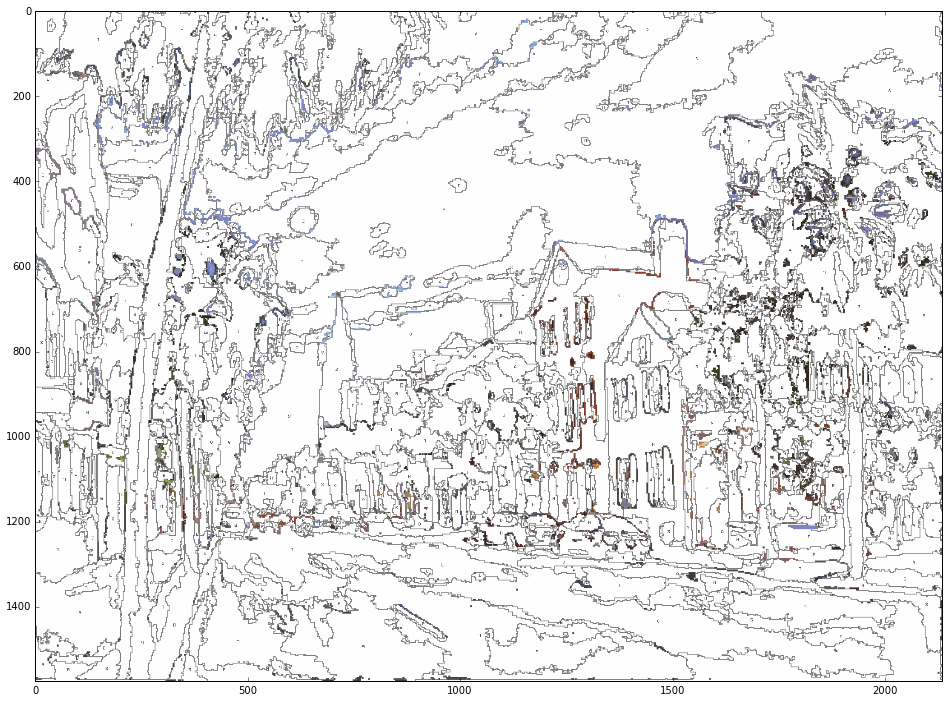

In [302]:
plt.figure(figsize=(24,12))
plt.imshow(pbn['pbn_unsolved'])

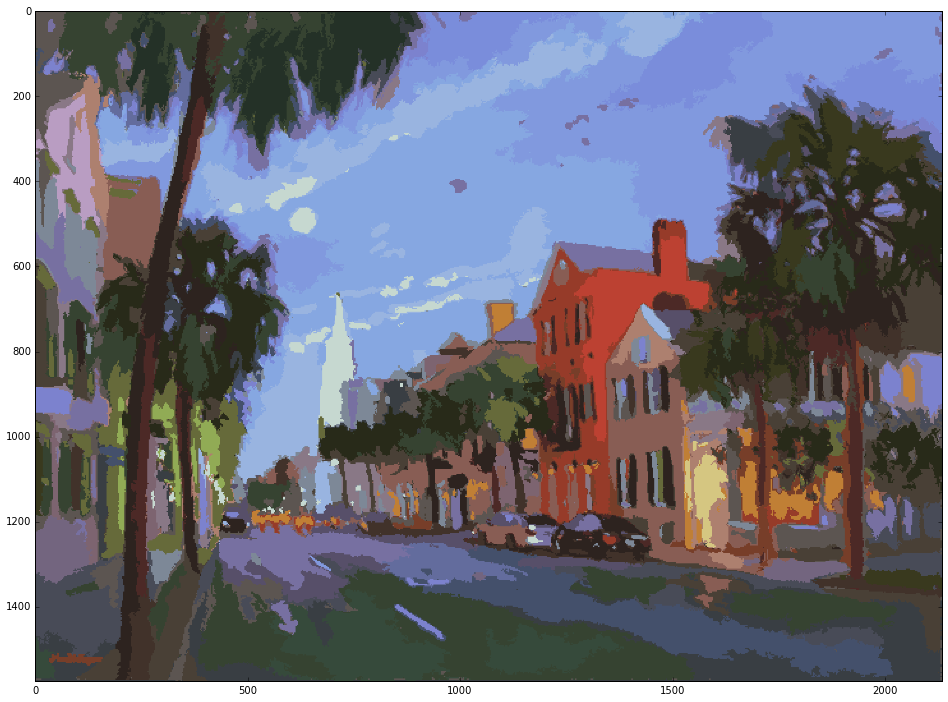

In [303]:
plt.figure(figsize=(24,12))
plt.imshow(pbn['pbn_solved'])

# Save Results

In [304]:
p1, p2, p3 = img_path('unpainted.png'), img_path('painted.png'), img_path('swatch.png')
matimg.imsave(p1, pbn['pbn_unsolved'])
matimg.imsave(p2, pbn['pbn_solved'])

'/Users/eczech/data/pbn/paintings/downtown/swatch.png'

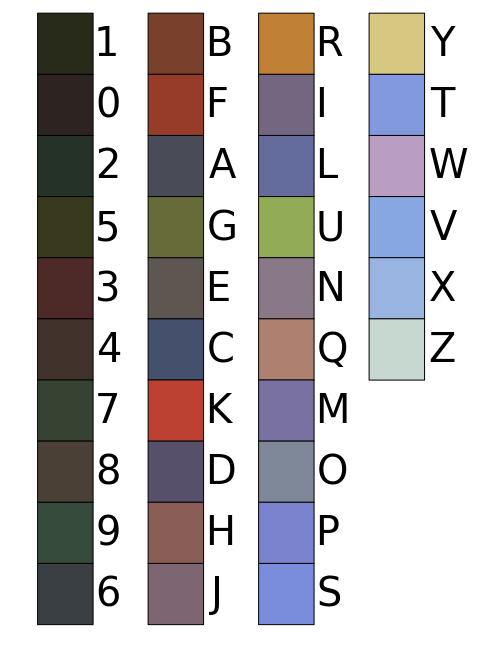

In [305]:
pbn_suite.export_color_swatch(p3, pbn['color_index'], res['alpha'],
                             swatch_height=500, swatch_width=500, colors_per_col=10, font_size=40)